In [1]:
import numpy as np

In [2]:
%load_ext autoreload
%autoreload 2
import matplotlib.pylab as plt
import numpy as np
from pathlib import Path
import sys
import math

flincpy_path = "/hetghome/antonpr/xmax_sigma/flincpy"
sys.path.insert(0, flincpy_path)

In [3]:
from propagation.interaction.csec_tables import CrossSectionTableMCEq
from propagation.interaction.csec_on_table import CrossSectionOnTable
from data_structs.pdg_pid_map import PdgPidMap, PdgLists

cs_table = CrossSectionTableMCEq()
# cs_table.add_pdgs(PdgLists().longer_pi0_to_mceq)

csec = CrossSectionOnTable(cs_table)



# pdg_list = np.array([111, 111, 111, 
#                     111, -211, 
#                     111, 111, 2212, 111], dtype=np.int32)
# pdg_list = np.array([13, -13, 11, -11, 22, 111, -211], dtype=np.int32)
# energy_list = np.array([5e3, 5e2, 4e6, 4e3, 2e5, 2e5, 4e3, 5e2, 2e5], dtype=np.float64) 

pdg_list = np.array([211, -211], dtype=np.int32)
energy_list = np.array([1e-1, 1e-1], dtype=np.float64)   

print(csec.get_mean_xdepth(pdg_list, energy_list))
print(csec.get_xdepth(pdg_list, energy_list))

[inf inf]
[inf inf]


In [4]:
import matplotlib.pylab as plt
# Plot parameters
params = {"mathtext.default": "regular",
          "text.usetex": False,
          "figure.dpi": 300}          
plt.rcParams.update(params)

In [5]:
npoints = 2000
pdg_pim = np.array([-211 for _ in range(npoints) ], dtype=np.int32)
pdg_pip = np.array([211 for _ in range(npoints) ], dtype=np.int32)
pdg_pi0 = np.array([111 for _ in range(npoints) ], dtype=np.int32)
energy_list = np.geomspace(1e-3, 1e7, npoints)   
mean_xdepth_pim = csec.get_mean_xdepth(pdg_pim, energy_list)
mean_xdepth_pip = csec.get_mean_xdepth(pdg_pip, energy_list)
mean_xdepth_pi0 = csec.get_mean_xdepth(pdg_pi0, energy_list)

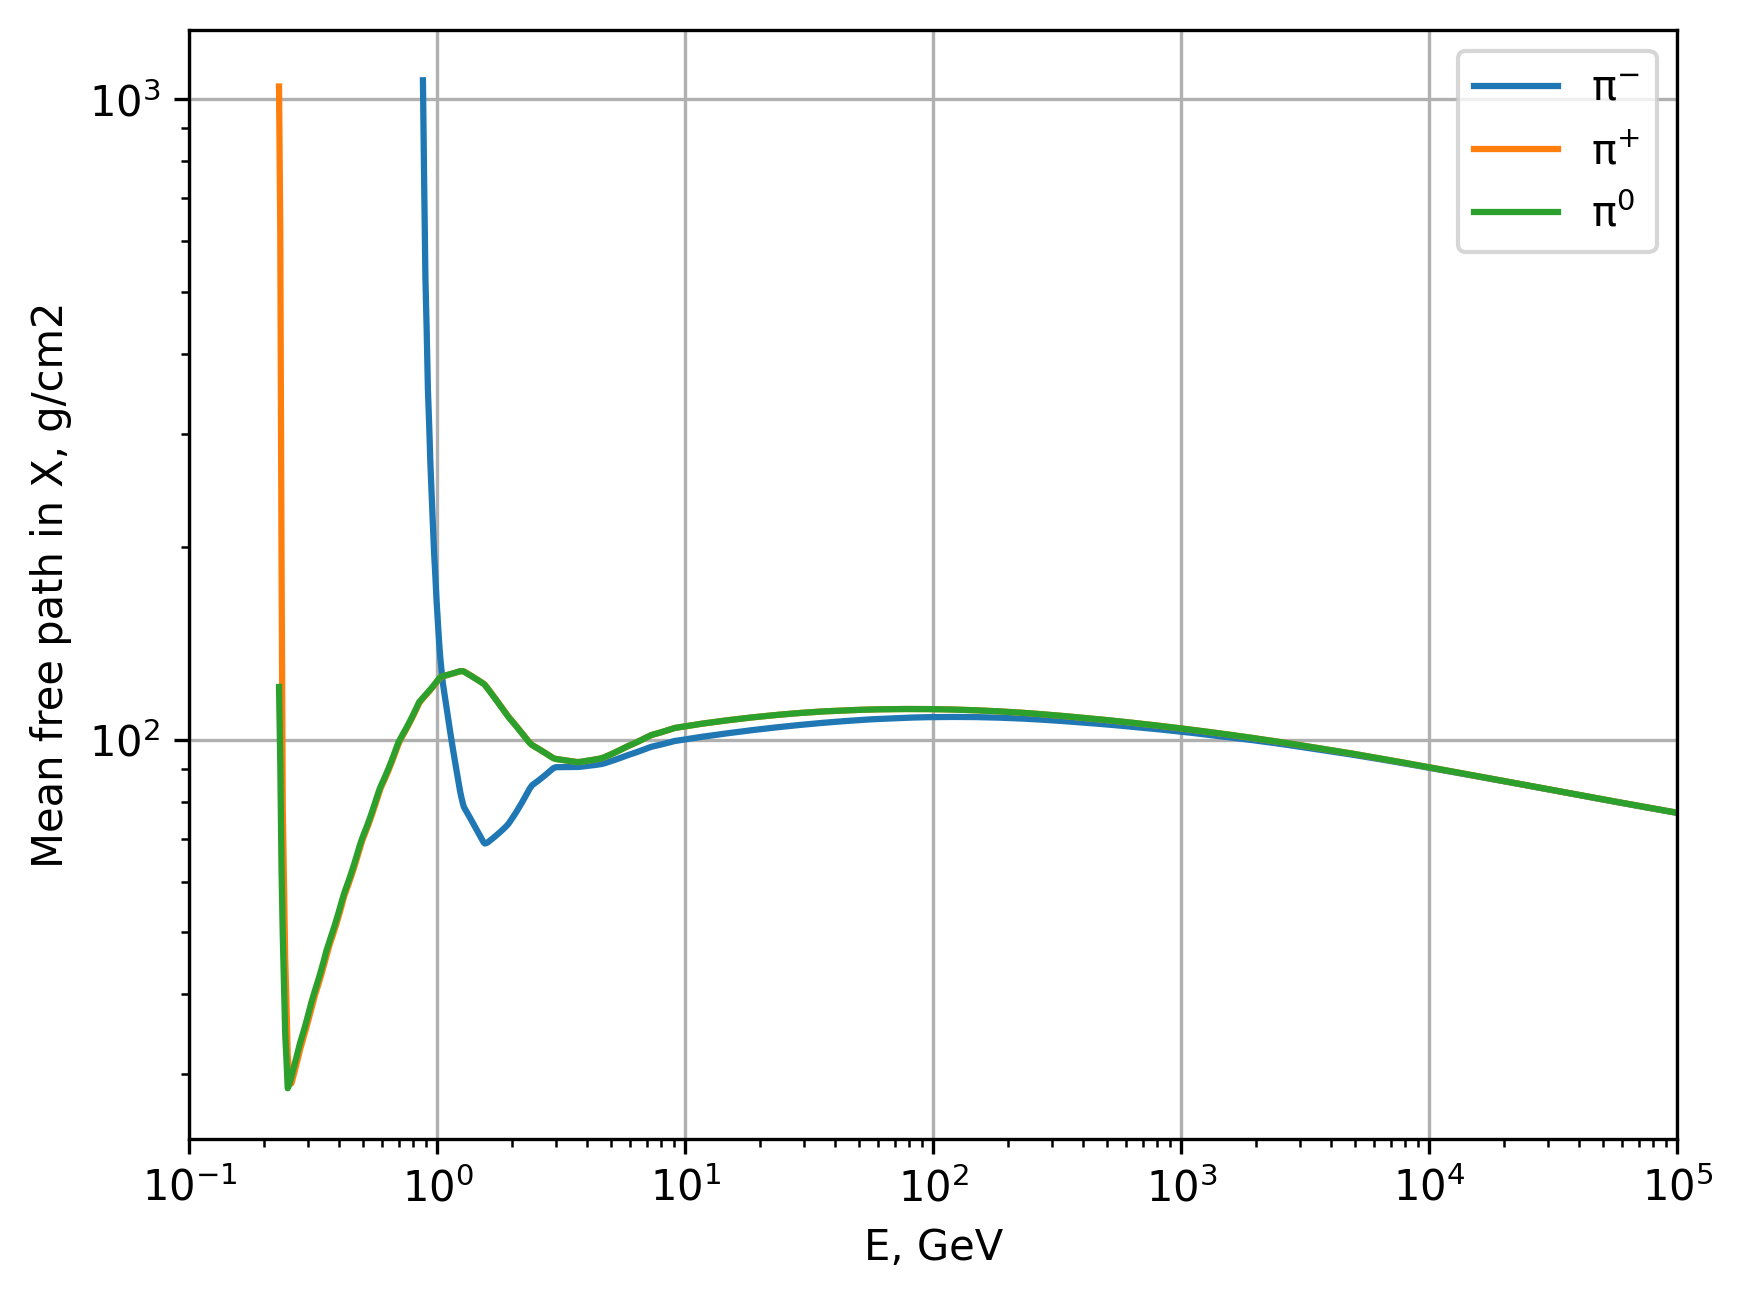

In [6]:
plt.plot(energy_list, mean_xdepth_pim, label = r"$\pi^{-}$")
plt.plot(energy_list, mean_xdepth_pip, label = r"$\pi^{+}$")
plt.plot(energy_list, mean_xdepth_pi0, label = r"$\pi^0$")

plt.xlim(1e-1, 1e5)
plt.xscale("log")
plt.xlabel("E, GeV")
plt.yscale("log")
plt.ylabel("Mean free path in X, g/cm2")
plt.legend()
plt.grid()


In [8]:
from MCEq.data import InteractionCrossSections, HDF5Backend

In [9]:
hdf5_backend = HDF5Backend()
interaction_cs = InteractionCrossSections(hdf5_backend, "DPMJETIII191")
interaction_cs.load("DPMJETIII191")

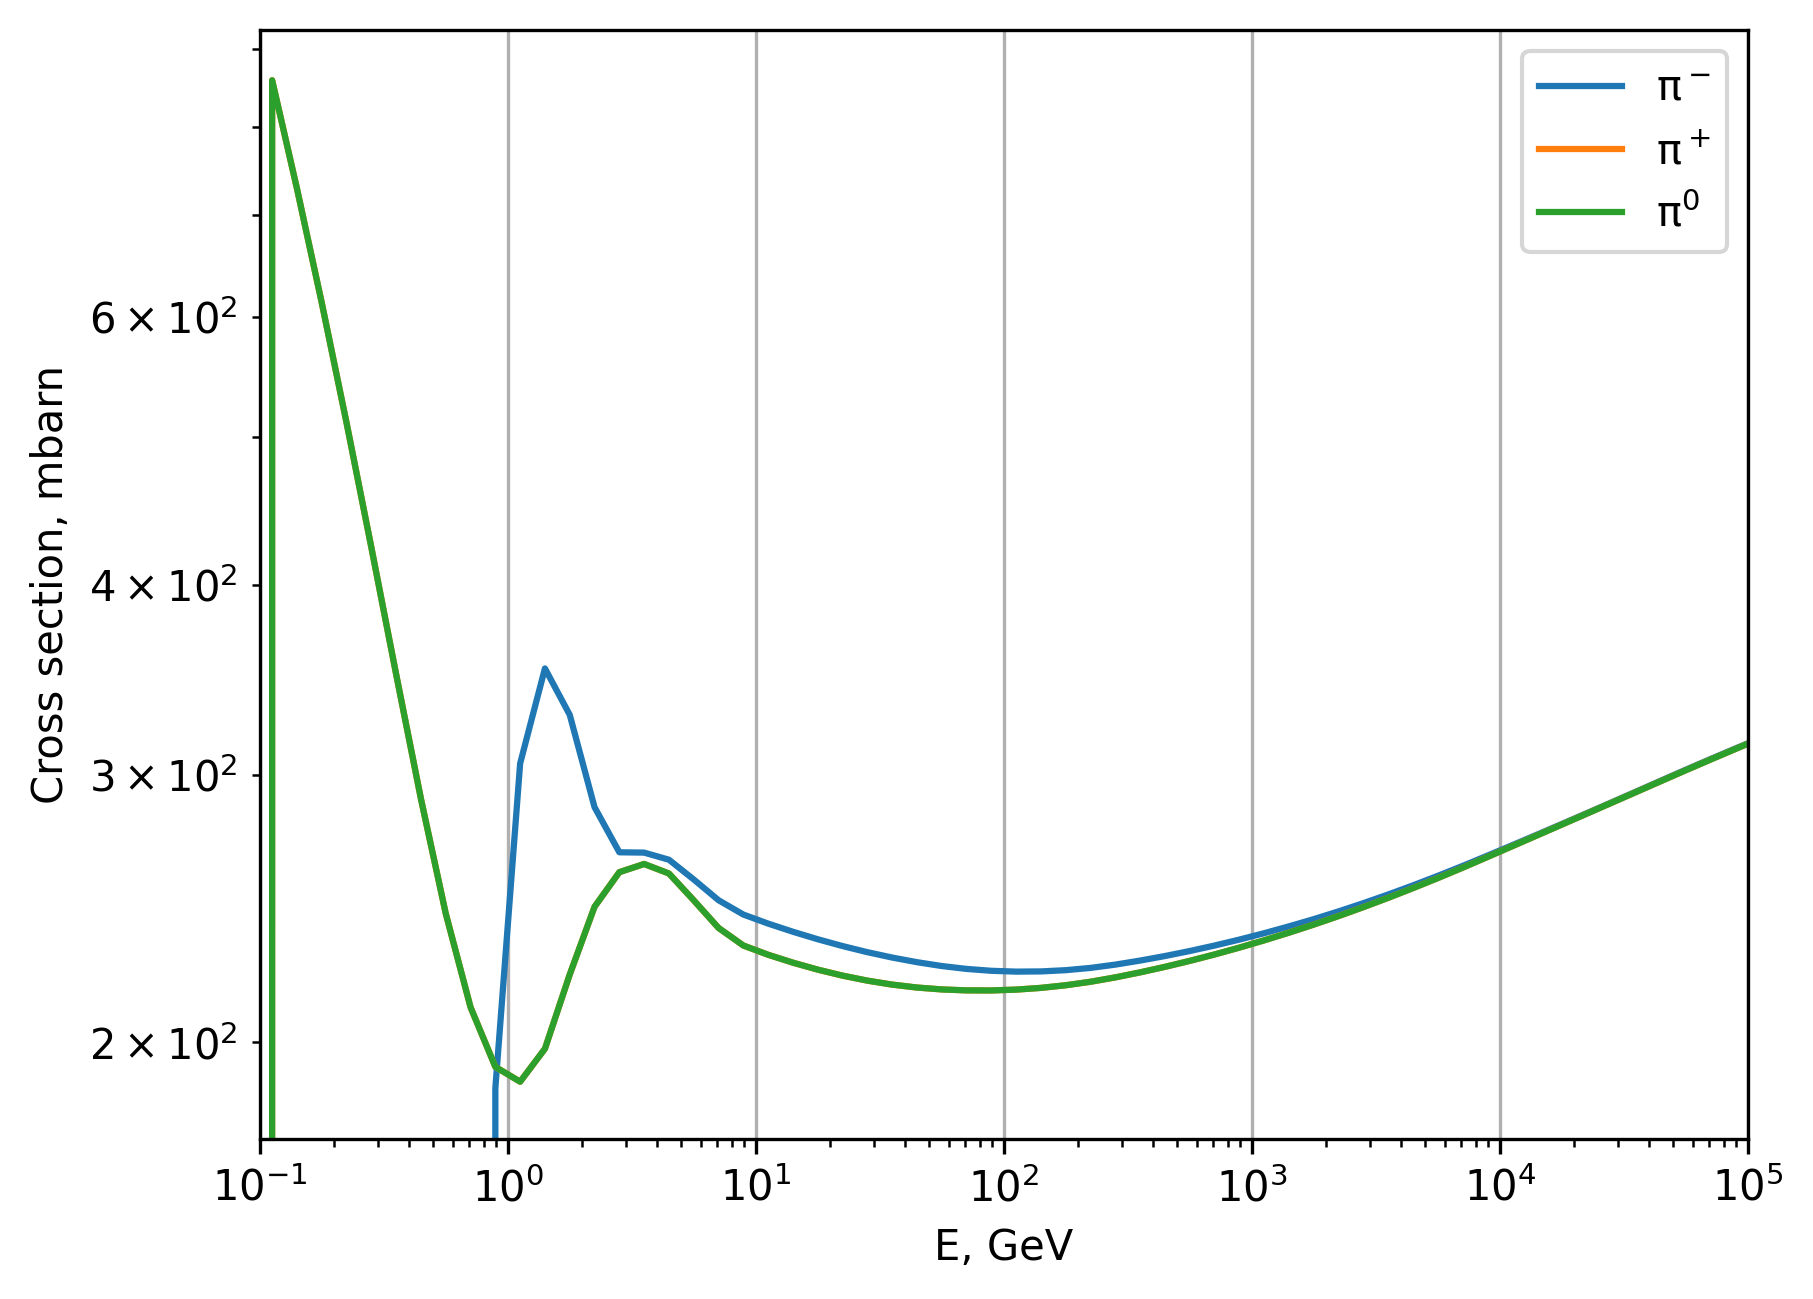

In [10]:
plt.plot(interaction_cs.energy_grid.c,interaction_cs.get_cs((-211,),mbarn=True),
         label = r"$\pi^-$")
plt.plot(interaction_cs.energy_grid.c,interaction_cs.get_cs((211,),mbarn=True),
         label = r"$\pi^+$")
plt.plot(interaction_cs.energy_grid.c,interaction_cs.get_cs((111,),mbarn=True),
         label = r"$\pi^0$")
plt.xlim(1e-1, 1e5)
plt.xscale("log")
plt.xlabel("E, GeV")
plt.yscale("log")
plt.ylabel("Cross section, mbarn")
plt.legend()
plt.grid()